# Waveguide Conductor Loss

Calculate waveguide conductor loss for different waveguide sizes.

In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

from waveguide import conductor_loss, cutoff_frequency, np2db, skin_depth

# Estimate Conductor Loss for a Variety of Waveguide Sizes

Assuming that they are gold-plated with a surface roughness factor of 1.5

In [2]:
# Approximate conductivity of gold
conductivity = 4.1e7
roughness_factor = 1.5
conductivity_rough = conductivity / roughness_factor ** 2

In [3]:
# Waveguide sizes
# omit WR-90 and WR-42 which do not have a 2:1 aspect ratio
wr_sizes = [75, 62, 51, 34, 28, 22.4, 18.8, 14.8, 12.2, 10.0, 6.5, 5.1, 4.3, 3.4, 2.8, 2.2, 1.9, 1.5, 1.2, 1.0]

In [4]:
loss_values = []
center_frequency = []
for wr in wr_sizes:
    
    a, b = wr*10*sc.mil, wr*5*sc.mil
    fc = cutoff_frequency(a, b)
    f1, f2, f3 = 1.25*fc, (1.25+1.90)*fc/2, 1.9*fc
    f = np.array([f1, f2, f3])
    waveguide_name = "WR-{}".format(wr)
    loss = np2db(conductor_loss(f, conductivity_rough, a, b))/100  # dB/m
    loss_values.append(10**(-loss[1]/10))  # linear
    center_frequency.append(f2)
    
    # Waveguide name
    print("{:7s} & ".format(waveguide_name), end="")
    # Waveguide size
    print(r"${:7.3f} \times {:6.3f}$ & ".format(a/sc.milli, b/sc.milli), end="")
    # Waveguide frequency range
    print(r"${:6.1f} - {:6.1f}$ & ".format(f1/sc.giga, f3/sc.giga), end="")
    # Waveguide loss
    print(r"${:6.4f} - {:6.4f}$ \\".format(loss[0], loss[2]))

WR-75   & $ 19.050 \times  9.525$ & $   9.8 -   15.0$ & $0.0031 - 0.0021$ \\
WR-62   & $ 15.748 \times  7.874$ & $  11.9 -   18.1$ & $0.0041 - 0.0028$ \\
WR-51   & $ 12.954 \times  6.477$ & $  14.5 -   22.0$ & $0.0054 - 0.0037$ \\
WR-34   & $  8.636 \times  4.318$ & $  21.7 -   33.0$ & $0.0100 - 0.0068$ \\
WR-28   & $  7.112 \times  3.556$ & $  26.3 -   40.0$ & $0.0134 - 0.0091$ \\
WR-22.4 & $  5.690 \times  2.845$ & $  32.9 -   50.1$ & $0.0187 - 0.0127$ \\
WR-18.8 & $  4.775 \times  2.388$ & $  39.2 -   59.6$ & $0.0243 - 0.0165$ \\
WR-14.8 & $  3.759 \times  1.880$ & $  49.8 -   75.8$ & $0.0348 - 0.0236$ \\
WR-12.2 & $  3.099 \times  1.549$ & $  60.5 -   91.9$ & $0.0466 - 0.0315$ \\
WR-10.0 & $  2.540 \times  1.270$ & $  73.8 -  112.1$ & $0.0627 - 0.0425$ \\
WR-6.5  & $  1.651 \times  0.825$ & $ 113.5 -  172.5$ & $0.1197 - 0.0811$ \\
WR-5.1  & $  1.295 \times  0.648$ & $ 144.6 -  219.9$ & $0.1722 - 0.1167$ \\
WR-4.3  & $  1.092 \times  0.546$ & $ 171.6 -  260.8$ & $0.2225 - 0.1507$ \\

[3.46102759e-25 1.17348617e-13 9.97888047e-01]


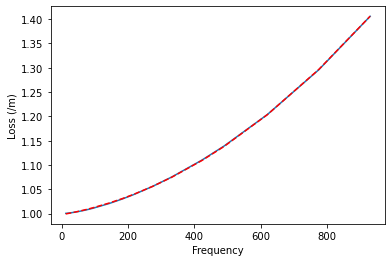

In [5]:
# Polyfit loss at center frequency
loss_values = np.array(loss_values)
center_frequency = np.array(center_frequency)
p = np.polyfit(center_frequency, 1 / loss_values, 2)

# Plot fit
plt.plot(center_frequency/1e9, 1 / loss_values)
plt.plot(center_frequency/1e9, np.polyval(p, center_frequency), 'r--')
plt.xlabel("Frequency")
plt.ylabel("Loss (/m)")

print(p)

In [6]:
# Maximum error, in %
print("Max error: {:.2f} %".format(np.abs((1 / loss_values - np.polyval(p, center_frequency)) * loss_values * 100).max()))

Max error: 0.11 %


# Estimate the Conductor Loss of Various WR-2.8 Waveguides

Calculate loss for different waveguide metals.

In [7]:
a, b = 28*sc.mil, 14*sc.mil
f = np.array([260e9, 400e9])

roughness_factor = 1.5
metals = ["Al", "Au", "Cu"]
conductivities = [3.816e7, 4.098e7, 5.813e7]

for metal, cond in zip(metals, conductivities):
    
    conductivity_rough = cond / roughness_factor ** 2
    loss = np2db(conductor_loss(f, conductivity_rough, a, b, er=1, ur=1))/100  # dB/m
    ds = skin_depth(f, cond)

    # Metal
    print("{:2s}    & ".format(metal), end="")
    # Conductivity
    print("{:.3f} & ".format(cond/1e7), end="")
    # Skin depth
    print(r"${:5.1f} - {:5.1f}$ & ".format(ds[0]*1e9, ds[1]*1e9), end="")
    # Waveguide loss
    print(r"${:6.4f} - {:6.4f}$ \\".format(loss[0], loss[1]))

Al    & 3.816 & $159.8 - 128.8$ & $0.4514 - 0.2974$ \\
Au    & 4.098 & $154.2 - 124.3$ & $0.4356 - 0.2870$ \\
Cu    & 5.813 & $129.5 - 104.4$ & $0.3657 - 0.2410$ \\
